![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 4.1.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "../DATA/Sacramentorealestatetransactions.csv"
data = pd.read_csv(house_csv)

In [3]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [5]:
data['zip'] = data['zip'].astype(str)

In [6]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [7]:
data.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


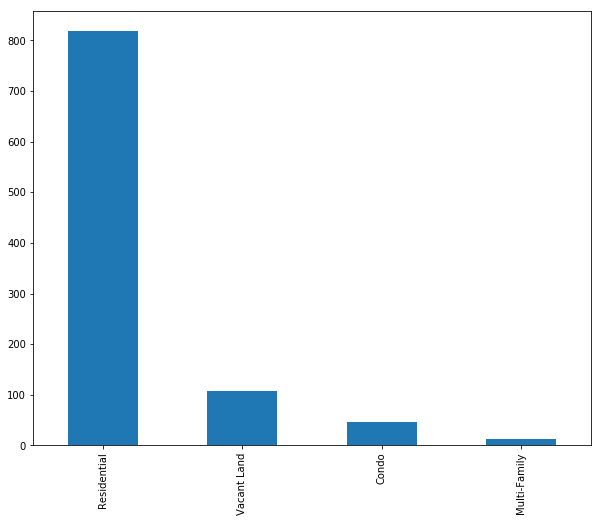

In [8]:
# The observations where there are 0 beds, baths and sqr_ft, are likely to be empty plots
data.loc[data['beds'] == 0, 'type'] = 'Vacant Land'
data['type'].value_counts().plot(kind='bar', figsize=(10,8));

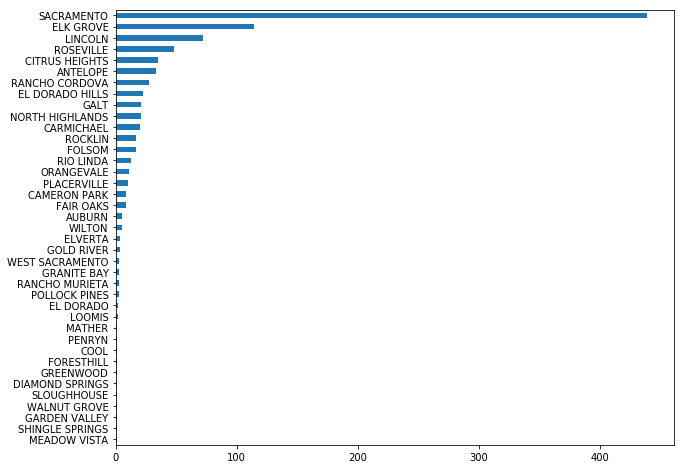

In [9]:
# City
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(10,8));

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

**ANSWER** The price is the target variable, because that is what we are trying to predict.

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [10]:
# ANSWER
data.select_dtypes(include=[np.number]).columns

Index(['beds', 'baths', 'sq__ft', 'price', 'latitude', 'longitude'], dtype='object')

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

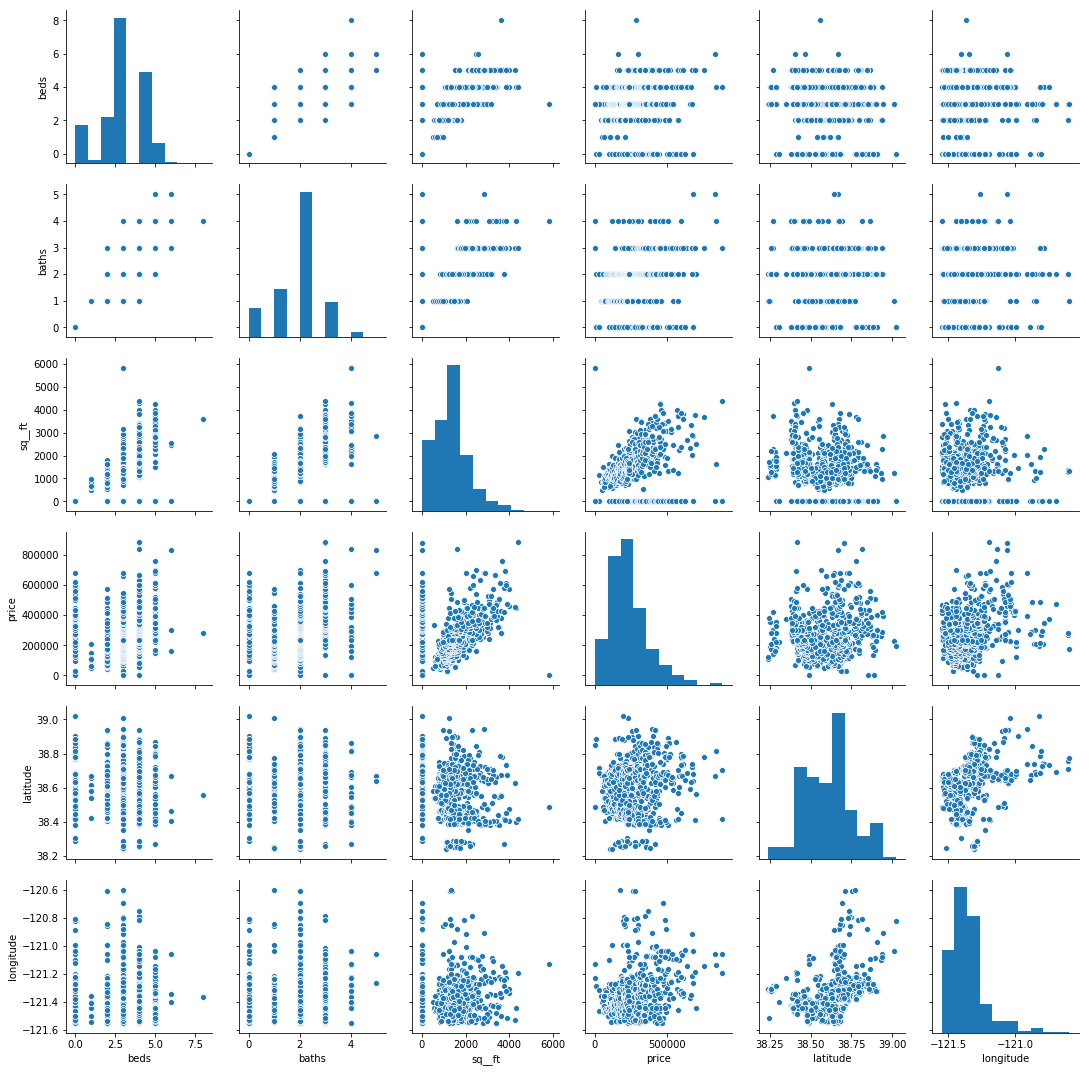

In [11]:
sns.pairplot(data.select_dtypes(include=[np.number]));
plt.show()

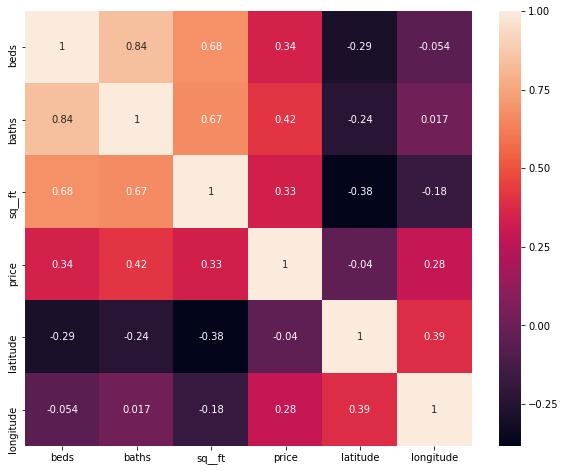

In [12]:
# ANSWER
plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(),annot=True);

Although the `baths` have a higher correlation, looking at the pari plot, there is less variation in the `sq__ft`, which has a similar correlation coefficient. Therefore the `sq__ft` is the best predictor.

#### 2.3 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [13]:
from sklearn.linear_model import LinearRegression

numerical_data = data.select_dtypes(include=[np.number])

Y = numerical_data['price']
X = numerical_data['sq__ft'].values.reshape(-1,1)
#X = numerical_data.drop(['price'],axis=1)

model = LinearRegression().fit(X, Y)
#print ('score: ',model.score(X, Y))
#print ('prediction: 2 sqft: = ',model.predict([[2]]))
print ('slope: ',model.coef_)
print ('intercept: ',model.intercept_) 

slope:  [54.15863969]
intercept:  162930.16140699777


##### 2.3.1 Fit predictor and target variables using linear regression 

In [14]:
# ANSWER

X = data['sq__ft'].values.reshape(-1,1)
Y = data['price']

##### 2.3.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [15]:
# ANSWER

model = LinearRegression().fit(X, Y)
print ('score: ',model.score(X, Y))

score:  0.11148717682951437


### 3. Splitting Data

In [16]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [17]:
# ANSWER
## Create training and testing subsets
y = data['price']
X = data['sq__ft']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [18]:
# ANSWER
## Check training/test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((659,), (326,), (659,), (326,))

In [19]:
X_train.head()

433    1758
172    1643
125    2354
541       0
879    1354
Name: sq__ft, dtype: int64

In [20]:
y_train.head()

433    217500
172     99000
125    335750
541    488750
879    104000
Name: price, dtype: int64

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [21]:
# ANSWER
model = LinearRegression().fit(X_train.values.reshape(-1,1), y_train)
print ('score: ',model.score(X_test.values.reshape(-1,1), y_test))

score:  0.13602012247180006


### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [22]:
# ANSWER
sq_ft = 1204
prediction = model.predict([[sq_ft]])
print ('prediction: ',sq_ft,' sqft: = ',prediction)

prediction:  1204  sqft: =  [223594.18266381]


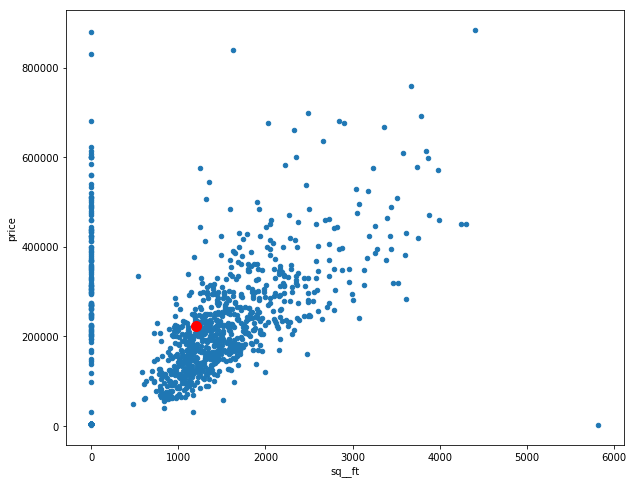

In [23]:

data['model_predict'] = model.intercept_ + model.coef_ * data['sq__ft']

ax = data.plot(kind='scatter',x='sq__ft',y='price',figsize=(10,8));
plt.plot(sq_ft,prediction,'ro',markersize=10);
plt.show()
#data.plot(kind='line',x='sq__ft',y='model_predict',color='red',ax=ax);